In [1]:
import numpy as np
import pandas as pd
import sklearn.cluimport numpy as np
import pandas as pd
import sklearn.cluster
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as pltster
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.pyplot as plt

In [17]:
filepath = "/mnt/c/Users/frpnz/Projects/FantaStats/data/Statistiche_Fantacalcio_Stagione_2023_24.xlsx"
df = pd.read_excel(filepath, header=1)
df = df[df.R == "A"]
df = df[df.Pv >= 20]

In [16]:
df[df["Nome"] == "Ikwuemesi"]

,Id,R,Rm,Nome,Squadra,Pv,Mv,Fm,Gf,Gs,Rp,Rc,R+,R-,Ass,Amm,Esp,Au
620,6425,A,Pc,Ikwuemesi,Salernitana,23,5.67,5.8,1,0,0,0,0,0,1,2,0,0


In [7]:
df_reduced = df[["Fm", "Mv", "Nome"]]
bonus = np.abs(df.Mv - df.Fm)
df_reduced["Bonus"] = bonus
df_reduced.index = df.Nome
del df_reduced["Nome"], df_reduced["Fm"]

/tmp/ipykernel_2717/78954944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["Bonus"] = bonus


In [8]:
df_reduced.head()

,Mv,Bonus
Nome,,
Martinez L.,6.65,2.08
Dybala,6.48,1.72
Scamacca,6.41,1.48
Giroud,6.26,1.45
Osimhen,6.36,1.52


In [9]:
scaler = sklearn.preprocessing.StandardScaler()
df_reduced_min_max = scaler.fit_transform(df_reduced)
pca = sklearn.decomposition.PCA(n_components=2)
X = pca.fit_transform(df_reduced_min_max)
df_X = pd.DataFrame(X)
df_X.index = df_reduced.index

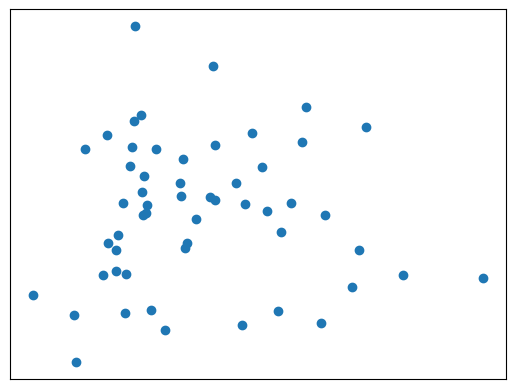

In [10]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df_X[0], df_X[1])fig, ax = plt.subplots(1, 1)
ax.scatter(df_X[0], df_X[1])
ax.set_xticks([])
ax.set_yticks([]);
ax.set_xticks([])
ax.set_yticks([]);

In [11]:
# IQR
# Calculate the upper and lower limits
Q1 = df_X[0].quantile(0.25)
Q3 = df_X[0].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array_0 = np.where(df_X[0] >= upper)[0]
lower_array_0 = np.where(df_X[0] <= lower)[0]

Q1 = df_X[1].quantile(0.25)
Q3 = df_X[1].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array_1 = np.where(df_X[1] >= upper)[0]
lower_array_1 = np.where(df_X[1] <= lower)[0]

# Removing the outliers
to_drop = df_X.index.values[np.concatenate((upper_array_0, 
                                            lower_array_0,
                                            upper_array_1,
                                            lower_array_1))]
df_X_no_outliers = df_X.drop(index=to_drop)

In [12]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df_X_no_outliers)
labels = kmeans.predict(df_X)

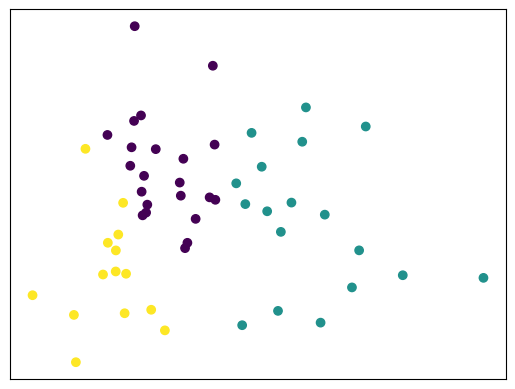

In [13]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df_X[0], df_X[1], c=labels)
ax.set_xticks([])
ax.set_yticks([]);

In [14]:
df_X["fascia"] = labels

In [15]:
df_X

,0,1,fascia
Nome,,,
Martinez L.,0.878727,-0.087365,1
Dybala,0.630050,-0.083821,1
Scamacca,0.495554,-0.050215,1
Giroud,0.376749,-0.147854,1
Osimhen,0.473442,-0.100277,1
Thuram,0.515969,0.117081,1
Lookman,0.389718,-0.001985,1
Vlahovic,0.245527,-0.131968,1
Rafael Leao,0.320210,0.096511,1
